In [34]:
import numpy as np 
import pymc3
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import theano.tensor as tt
import os

os.chdir("/Users/marysilva/Desktop/")
beetles = pd.read_csv("beetles.txt", header=None, delimiter=' ')
beetles.columns = ["logDose", "numBeetles", "numDied"]
beetles['prob'] = beetles['numDied']/beetles['numBeetles']
y = beetles['numDied'] * 1.
m = beetles['numBeetles']
N = len(y)
beetles['ones'] = np.ones(len(y))
ones = beetles['ones']
x=beetles['logDose']
ones = np.ones(len(x))
X_train = np.array([ones, x])
X_train = X_train.T

# Explicit Model
## Model 1 (cloglog)

In [48]:
def cloglog(theta):
    '''Complimentary log-log transformation'''
    return 1 - np.exp(-1*np.exp(theta))

In [49]:
model = pymc3.Model()
with model:   
    params = pymc3.Normal("params", mu=0., tau=1., shape=X_train.shape[1])
    p = cloglog(tt.dot(X_train, params))
    y_ = pymc3.Binomial("y_",n=m, p=p, observed=y)
    
    # can be used with test data or analog with train data for further analysis
    start = pymc3.find_MAP()
    trace = pymc3.sample(5000, chains=1, njobs=1)

logp = -133.93, ||grad|| = 24.446: 100%|██████████| 17/17 [00:00<00:00, 1008.85it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/marysilva/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Sequential sampling (1 chains in 1 job)
NUTS: [params]
100%|██████████| 5500/5500 [00:22<00:00, 249.59it/s]
The acceptance probability does not match the target. It is 0.8917180030337016, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2453f978>,
      dtype=object)

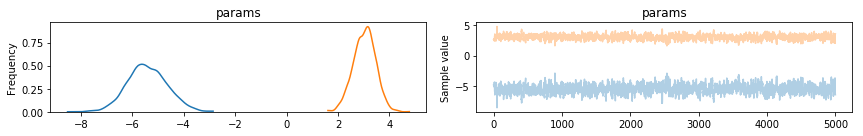

In [50]:
pymc3.traceplot(trace)

In [51]:
pymc3.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
params__0,-5.424971,0.761734,0.029004,-6.891804,-3.923178
params__1,3.024438,0.427782,0.016286,2.193613,3.860664


In [52]:
model = pymc3.Model()
with model:   
    params = pymc3.Flat("params", shape=X_train.shape[1])
    p = cloglog(tt.dot(X_train, params))
    y_ = pymc3.Binomial("y_",n=m, p=p, observed=y)
    
    # can be used with test data or analog with train data for further analysis
    start = pymc3.find_MAP()
    trace1 = pymc3.sample(5000, chains=1, njobs=1)

logp = -69.463, ||grad|| = 244.86: 100%|██████████| 21/21 [00:00<00:00, 1397.39it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/marysilva/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Sequential sampling (1 chains in 1 job)
NUTS: [params]
100%|██████████| 5500/5500 [00:54<00:00, 100.06it/s]
The acceptance probability does not match the target. It is 0.9129416002747947, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c250e32e8>,
      dtype=object)

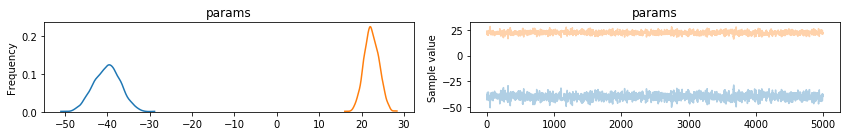

In [53]:
# with just 3 parameters on approximate the same scale the
# build in traceplot works quite well:
pymc3.traceplot(trace1)


In [54]:
pymc3.summary(trace1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
params__0,-40.096417,3.149397,0.105969,-46.046463,-33.951675
params__1,22.330612,1.748034,0.058808,18.917187,25.629997


## Model 2 (logit)

In [55]:
def logit(theta):
    '''Complimentary log-log transformation'''
    return 1/(1 + np.exp(-1*theta))


In [56]:
model = pymc3.Model()
with model:   
    params = pymc3.Flat("params", shape=X_train.shape[1])
    p = logit(tt.dot(X_train, params))
    y_ = pymc3.Binomial("y_",n=m, p=p, observed=y)
    
    # can be used with test data or analog with train data for further analysis
    start = pymc3.find_MAP()
    trace2 = pymc3.sample(5000, chains=1, njobs=1)

logp = -75.998, ||grad|| = 144.05: 100%|██████████| 21/21 [00:00<00:00, 1534.96it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/marysilva/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Sequential sampling (1 chains in 1 job)
NUTS: [params]
100%|██████████| 5500/5500 [00:51<00:00, 106.07it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25137828>,
      dtype=object)

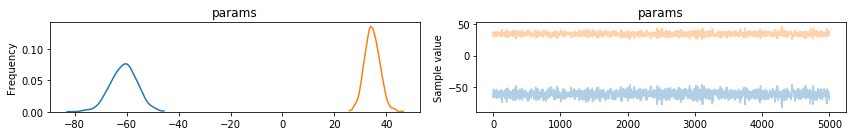

In [57]:
pymc3.traceplot(trace2)

In [58]:
pymc3.summary(trace2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
params__0,-61.139813,5.222347,0.157759,-71.000049,-50.631876
params__1,34.508317,2.936346,0.088645,28.572672,40.069204


## Model 3 (Modified Logit)

In [77]:
def modified_logit(theta, a):
    '''Modified transformation'''
    return tt.exp(a*theta) / (1 + tt.exp(theta))**a

In [80]:
model = pymc3.Model()
with model:   
    params = pymc3.Flat("params", shape=X_train.shape[1])
    a = pymc3.Gamma('a', 2., 0.01)
    theta = tt.dot(X_train, params)
    p = modified_logit(theta, a)
    y_ = pymc3.Binomial("y_",n=m, p=p, observed=y)
    
    # can be used with test data or analog with train data for further analysis
    start = pymc3.find_MAP()
    trace2 = pymc3.sample(8000, chains=1, njobs=1)

logp = -135.79, ||grad|| = 8.331: 100%|██████████| 17/17 [00:00<00:00, 1072.28it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/marysilva/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Sequential sampling (1 chains in 1 job)
NUTS: [a_log__, params]
100%|██████████| 8500/8500 [06:03<00:00, 23.39it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c264d0d30>,
      dtype=object)

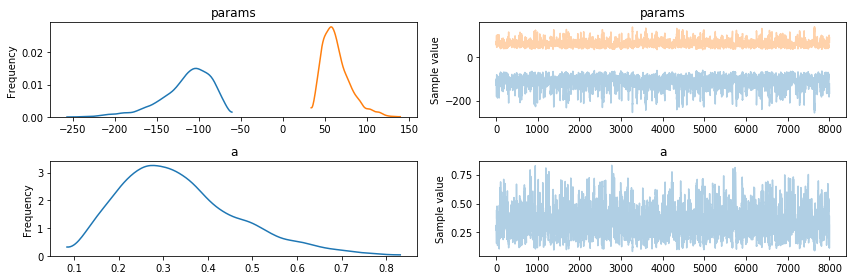

In [81]:
pymc3.traceplot(trace2)

In [82]:
pymc3.summary(trace2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
params__0,-115.147479,31.266312,1.054475,-178.176612,-66.138692
params__1,63.391306,16.864285,0.567463,37.130776,97.883046
a,0.335441,0.131718,0.004689,0.115392,0.604799


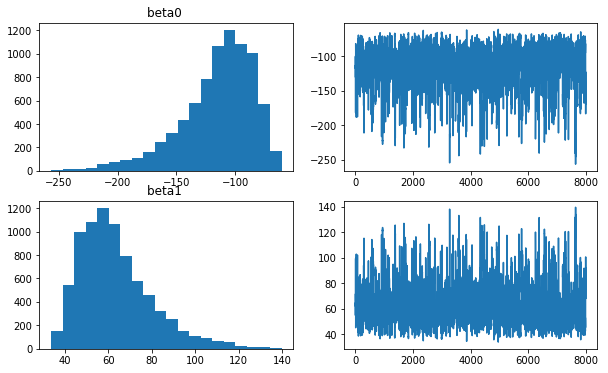

In [94]:
burn_in = 0
params_ = trace2["params"][burn_in:]
plt.figure(figsize=(10,6))
nb_plots = params_.shape[1]
bins=20
for i in range(nb_plots):
    plt.subplot(nb_plots, 2, i*2+2) 
    plt.plot(range(params_.shape[0]), params_[:,i])
    plt.subplot(nb_plots, 2, i*2+1)
    plt.hist(params_[:,i], bins=bins)
    plt.title("beta%d "%i)

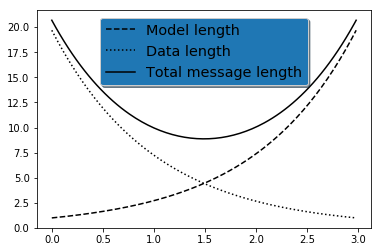

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()


In [4]:
# Use a theano shared variable to be able to exchange the data the model runs on
from theano import shared

# Log dose in each group
log_dose = np.array([-.86, -.3, -.05, .73])

# Let's make this a theano shared variable so that we can make predictions for new values later
log_dose_shared = shared(log_dose)

# Sample size in each group
n = 5 * np.ones(4, dtype=int)

# The sample size has to be a shared variable too
n_shared = shared(n)

# Outcomes
deaths = np.array([0, 1, 3, 5])

In [5]:
import pandas as pd

In [12]:
pd.DataFrame([log_dose, n, deaths])

,0,1,2,3
0,-0.86,-0.3,-0.05,0.73
1,5.00,5.0,5.00,5.00
2,0.00,1.0,3.00,5.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)



Text(0.5,1,'Simplest errorbars, 0.2 in x, 0.4 in y')

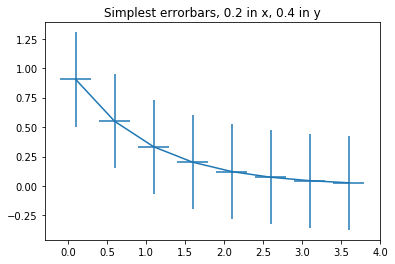

In [3]:
# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")



Text(0.5,0.98,'Variable errorbars')

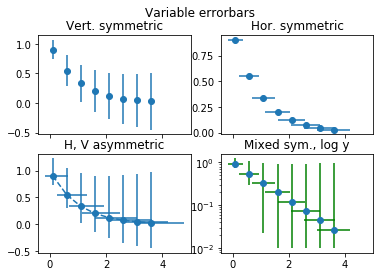

In [4]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

In [ ]:
f = lambda a, b, xp: cloglog(a+b*xp)
